Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

Ans:- clustering is used to divide the dataset in different categories depending on there similarities and variations, it is usefull to separate customers on basis of their purchasing power like and dislike towards the perticular product, it helps farms to target specific group of customers.

Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?

Ans In DBSCAN we do not give how many clusters we need, it can cluster irrigular shaped cluester which is not possible when clustering is done by k-means.

Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?

Ans we use Silhouette Score to measure performance in hyper parameter testing to find best epsilon and minimum points paramenters

Q4. How does DBSCAN clustering handle outliers in a dataset?

ANS:- DBSCAN makes the outliers as noice point and separate them easily from the core points and border points.
 Q5. How does DBSCAN clustering differ from k-means clustering?
 
 Here are some key differences between the two:

Handling Different Cluster Shapes:

DBSCAN: DBSCAN is capable of identifying clusters of arbitrary shapes. It defines clusters as dense regions separated by sparser areas in the data space. It can handle clusters that are non-linear, irregular, or have varying densities.
k-means: k-means assumes that clusters are spherical and have similar sizes. It partitions the data into k clusters by minimizing the sum of squared distances between data points and their cluster centroids. As a result, it works well for clusters that are globular and have a similar variance.
Requirement of the Number of Clusters:

DBSCAN: DBSCAN does not require prior knowledge or explicit specification of the number of clusters. It automatically determines the number of clusters based on the data density and connectivity.
k-means: k-means requires the number of clusters (k) to be specified in advance. It partitions the data into k clusters, which must be predefined.
Handling Outliers and Noise:

DBSCAN: DBSCAN is capable of identifying noise points and outliers as it defines them as data points that do not belong to any cluster. It can effectively handle datasets with noise and outliers, as they are considered as separate entities.
k-means: k-means does not explicitly handle outliers or noise. Outliers can distort the cluster centroids and affect the clustering results. Preprocessing or outlier detection techniques may be needed to handle outliers effectively in k-means.
Parameter Sensitivity:

DBSCAN: DBSCAN has two main parameters: epsilon (ε), which defines the radius around each point, and minimum points (MinPts), which sets the minimum number of points required to form a dense region. Tuning these parameters is important for achieving desirable clustering results, and their values depend on the data and the desired clusters.
k-means: k-means is sensitive to the initial placement of cluster centroids. The algorithm can converge to different solutions depending on the initial centroid positions. Multiple runs with different initializations may be required to mitigate this sensitivity.
Computational Complexity:

DBSCAN: DBSCAN's time complexity is typically higher than k-means, especially for large datasets, as it needs to calculate pairwise distances between data points. However, it can be optimized using spatial indexing structures like KD-trees or R-trees.
k-means: k-means is computationally efficient and scales well with large datasets. Its time complexity is generally lower than DBSCAN.

Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?

Curse of Dimensionality: The curse of dimensionality refers to the phenomenon where the data becomes increasingly sparse as the number of dimensions increases. In high dimensional spaces, the available data points might be sparsely distributed, making it difficult for DBSCAN to identify dense regions accurately. The density-based nature of DBSCAN relies on the local density of points, which can be affected by the curse of dimensionality.

Increased Distance Measures: In high dimensional spaces, the concept of distance becomes less reliable due to the increased number of dimensions. The distance between points tends to become more uniform, and the differences between nearest and farthest neighbors diminish. As a result, it becomes challenging to determine suitable values for the epsilon parameter in DBSCAN, which defines the neighborhood radius around each point.

Feature Irrelevance: High dimensional spaces often contain irrelevant or redundant features that do not contribute significantly to the clustering structure. These irrelevant features can lead to noise and distort the density estimation, making it harder for DBSCAN to identify meaningful clusters.

Dimensionality Reduction: To mitigate the challenges of high dimensional spaces, dimensionality reduction techniques can be employed to reduce the number of features while retaining the important information. Techniques such as Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE) can be used to project the data onto a lower-dimensional space before applying DBSCAN. This can help to improve the clustering results and mitigate the effects of the curse of dimensionality.

Parameter Selection: The choice of appropriate parameter values, such as epsilon and minimum points, becomes more critical in high dimensional spaces. The determination of these parameters can be challenging due to the sparsity of data and the reduced discriminatory power of distances. Strategies like using domain knowledge, data visualization, or automated parameter selection methods become crucial to find suitable parameter values.
Q7. How does DBSCAN clustering handle clusters with varying densities?

Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

Silhouette Score: The silhouette score measures the compactness and separation of clusters. It assigns a score to each data point based on the average distance to other points within its own cluster and the average distance to the nearest neighboring cluster. The overall silhouette score is the mean of these individual scores. Higher silhouette scores indicate better-defined and well-separated clusters.

Calinski-Harabasz Index: The Calinski-Harabasz index calculates the ratio of between-cluster dispersion to within-cluster dispersion. It favors clusters that are well-separated and compact. Higher index values indicate better-defined clusters.

Q10. How does DBSCAN clustering handle datasets with noise or missing values?

Ans :- DBSCAN can easily separate noice point, core point and border point while making cluster hence noise points are spearated, to separate missing points we can remove that point or fill it with mean, median or mode values as per requirement.

Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

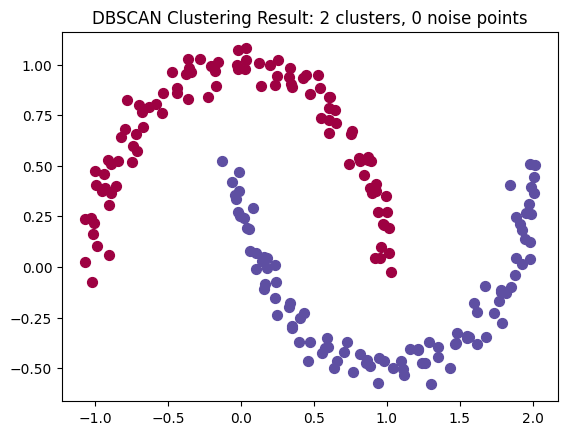

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample dataset (make_moons)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Retrieve the cluster labels and core samples
labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Plotting the clustering result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o')

    xy = X[class_member_mask & ~core_samples]
    plt.scatter(xy[:, 0], xy[:, 1], s=25, c=[col], marker='x')

plt.title(f'DBSCAN Clustering Result: {n_clusters} clusters, {n_noise} noise points')
plt.show()


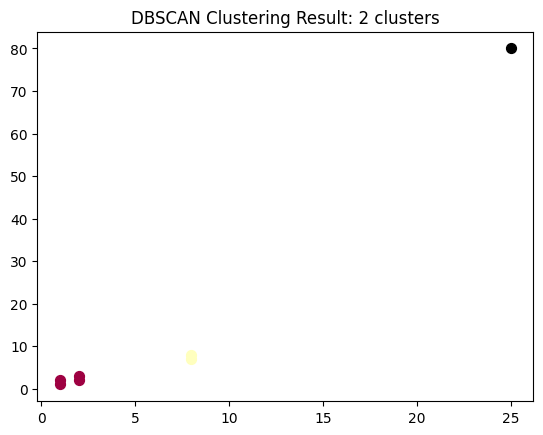

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Sample dataset
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(X)

# Retrieve the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plotting the clustering result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o')

plt.title(f'DBSCAN Clustering Result: {n_clusters} clusters')
plt.show()


In [3]:
df= pd.read_csv('mall.csv')
df

<IPython.core.display.Javascript object>

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.dropna()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df=df.drop('CustomerID', axis=1)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
df['Genre'] = df['Genre'].replace({'Male': 1, 'Female': 0})
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [8]:
from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df)

# Create a new dataframe with the normalized features
df = pd.DataFrame(normalized_features, columns=df.columns)
df

<IPython.core.display.Javascript object>

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid

# Assuming 'df' is your preprocessed dataframe

# Define the range of hyperparameter values to search
param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples': [2, 3, 4, 5, 6]
}

best_score = -1
best_eps = None
best_min_samples = None

# Iterate over the parameter combinations
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan.fit(df)
    labels = dbscan.labels_
    
    try:
    # Evaluate the clustering performance using silhouette score
        silhouette = silhouette_score(df, labels)

        # Update the best parameters if a better score is found
        if silhouette > best_score:
            best_score = silhouette
            best_eps = params['eps']
            best_min_samples = params['min_samples']
    except:
        continue

print("Best parameters: eps =", best_eps, ", min_samples =", best_min_samples)


Best parameters: eps = 0.5 , min_samples = 2


In [22]:
dbscan = DBSCAN(eps=.7, min_samples=4)
dbscan.fit(df)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'df' is your preprocessed dataframe and 'dbscan' is the fitted DBSCAN model

labels = dbscan.fit_predict(df)
print(labels)
# labels = dbscan.labels_
silhouette = silhouette_score(df, labels)
print("Silhouette Coefficient:", silhouette)

[-1  0 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  0  1  0 -1 -1 -1  0  1  0
  1  0  1  0  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  0  2  1  1  1  1  1
  1  1  1 -1  1  2  1  2  1  2  1  2  2  3  1  1  2  3  1  1  3  1  2  1
  1  1  2  3  1  2  1  1  2  2  2  1  1  2  1  1  1  1  1  3  2  1  1  3
  1  1  2  3  1  1  2  3  2  1  1  2  2  2  2  1  1  3  1  1  1  1  1  1
  3  1  1  4  1  1  2  4 -1  4  2  4  1  1  5  1  6  4  5  1  6  4  1  1
  5  4  2  1  7  4  2  4  6  1  6  1  2  1  2  1  1  1  5  1  2  1  2  1
  7  4  2  4  2  4  6  1 -1  4 -1  4  7  1  2  1  7  4  6  4  7  1  7  1
 -1  1 -1  1 -1 -1 -1 -1]
Silhouette Coefficient: 0.13577223739354735


In [23]:
# Evaluate the performance using different metrics
silhouette = silhouette_score(df, labels)
calinski_harabasz = calinski_harabasz_score(df, labels)
davies_bouldin = davies_bouldin_score(df, labels)

print("Silhouette Coefficient:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Coefficient: 0.13577223739354735
Calinski-Harabasz Index: 20.99046208740555
Davies-Bouldin Index: 1.9779065816967534


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/_0/6mxrdhbx3ynb4d0_h8gp41tw0000gn/T/ipykernel_2512/339150389.py:9: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, palette=custom_palette)


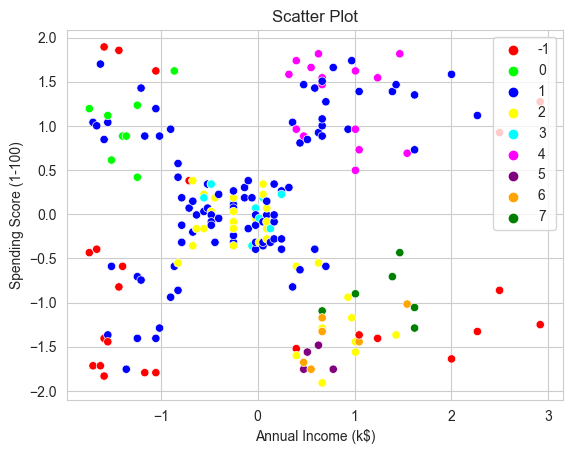

In [24]:
# Set the plot style (optional)
sns.set_style("whitegrid")

# Define a custom color palette
custom_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800080', '#FFA500', '#008000', '#800000', '#008080', '#FFC0CB']
 # Example colors

# Create a scatter plot with custom color palette
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, palette=custom_palette)

# Customize the plot (optional)
plt.title('Scatter Plot')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()